## Load Data in from github

In [ ]:
# load all the data if needed
#! git clone https://github.com/propublica/compas-analysis.git

#file_name = "compas-scores-two-years.csv"

In [ ]:
# Load dataset

import pandas as pd
pd.options.display.max_rows = 8000    # data has 7214 rows

url = 'https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv'

# Dressel et al. found that the 2 features, age + num of priors, used in LR performed as well as COMPAS
# two_year_recid is ground truth
df = pd.read_csv(url)

# filitering out certain races decreases the accuracy
#df = df[(df['race'] == 'Caucasian') | (df['race'] == 'African-American')]

In [ ]:
# data investigation
# df.describe()
df.head(20)
# print(df.shape)
# df.info()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
5,7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,...,1,Low,2013-11-30,2013-11-30,2013-12-01,0,1,853,0,0
6,8,edward riddle,edward,riddle,2014-02-19,Male,1974-07-23,41,25 - 45,Caucasian,...,2,Low,2014-02-19,2014-03-31,2014-04-18,14,5,40,1,1
7,9,steven stewart,steven,stewart,2013-08-30,Male,1973-02-25,43,25 - 45,Other,...,3,Low,2013-08-30,2014-05-22,2014-06-03,3,0,265,0,0
8,10,elizabeth thieme,elizabeth,thieme,2014-03-16,Female,1976-06-03,39,25 - 45,Caucasian,...,1,Low,2014-03-16,2014-03-15,2014-03-18,0,2,747,0,0
9,13,bo bradac,bo,bradac,2013-11-04,Male,1994-06-10,21,Less than 25,Caucasian,...,5,Medium,2013-11-04,2015-01-06,2015-01-07,1,0,428,1,1


In [ ]:
missing_data = df.isnull().sum().sort_values(ascending = False).head(53)
# % of missing values
pd.DataFrame({'No. missing values': missing_data})

,No. missing values
violent_recid,7214
vr_charge_degree,6395
vr_case_number,6395
vr_offense_date,6395
vr_charge_desc,6395
c_arrest_date,6077
r_jail_out,4898
r_jail_in,4898
r_days_from_arrest,4898
r_charge_desc,3801


## Data Processing
* Drop all the columns with NA value.
* Drop the duplicate column decile_Score.
* Drop one year recidivism
* Drop name
* Reference without race so that we can do fairness evaluation later
* two_year_recid


In [ ]:
# dropping all null columns and checking final shape
df.dropna(inplace=True, axis=1)
print("\nMissing datapoints?", df.isnull().values.any())
print("Numer of columns left after Na dropping: ", df.shape[1])


Missing datapoints? False
Numer of columns left after Na dropping:  31


In [ ]:
# encode all the features with text dtypes
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['sex_encoded'] = encoder.fit_transform(df['sex'])
df['c_charge_degree_encoded'] = encoder.fit_transform(df['c_charge_degree'])
df['type_of_assessment_encoded'] = encoder.fit_transform(df['type_of_assessment'])
df['score_text_encoded'] = encoder.fit_transform(df['score_text'])
df['v_type_of_assessment_encoded'] = encoder.fit_transform(df['v_type_of_assessment'])
df['v_score_text_encoded'] = encoder.fit_transform(df['v_score_text'])
df['screening_date_encoded'] = encoder.fit_transform(df['screening_date'])
df['v_screening_date_encoded'] = encoder.fit_transform(df['v_screening_date'])
df['race_encoded'] = encoder.fit_transform(df['race'])

# finding the duplicate features
are_same = df['decile_score'].equals(df['decile_score.1'])
print(are_same)

# drop all unnecessary features for prediction
df = df.drop(['decile_score.1', 'priors_count.1'], axis=1) # Duplicates
df = df.drop(['name', 'first', 'last', 'id', 'sex', 'c_charge_degree', 'type_of_assessment',
              'score_text', 'v_type_of_assessment', 'v_score_text', 'screening_date',
              'v_screening_date', 'race', 'dob', 'age_cat', 'compas_screening_date', 'is_violent_recid', 'is_recid'], axis=1) # We Drop it as a decision

True


In [ ]:
df.head(10)

,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,v_decile_score,start,end,event,two_year_recid,sex_encoded,c_charge_degree_encoded,type_of_assessment_encoded,score_text_encoded,v_type_of_assessment_encoded,v_score_text_encoded,screening_date_encoded,v_screening_date_encoded,race_encoded
0,69,0,1,0,0,0,1,0,327,0,0,1,0,0,1,0,1,205,205,5
1,34,0,3,0,0,0,1,9,159,1,1,1,0,0,1,0,1,26,26,0
2,24,0,4,0,1,4,3,0,63,0,1,1,0,0,1,0,1,102,102,0
3,23,0,8,1,0,1,6,0,1174,0,0,1,0,0,0,0,2,12,12,0
4,43,0,1,0,0,2,1,0,1102,0,0,1,0,0,1,0,1,83,83,5
5,44,0,1,0,0,0,1,1,853,0,0,1,1,0,1,0,1,310,310,5
6,41,0,6,0,0,14,2,5,40,1,1,1,0,0,2,0,1,391,391,2
7,43,0,4,0,0,3,3,0,265,0,0,1,0,0,1,0,1,221,221,5
8,39,0,1,0,0,0,1,2,747,0,0,0,1,0,1,0,1,416,416,2
9,21,0,3,0,0,1,5,0,428,1,1,1,0,0,1,0,2,284,284,2


In [ ]:
# check shape at stage
print("Numer of columns left: ", df.shape[1])

Numer of columns left:  20


## Deep Neural Network implementation


### Split training and test set

In [ ]:
from sklearn.model_selection import train_test_split
# train_num = int(len(df) * 0.8) # another way to split the data

train, test = train_test_split(df, test_size=0.2)


# Neat pick the columns to include
columns_to_include = ['age','priors_count', 'decile_score','v_decile_score', 'score_text_encoded', 'v_score_text_encoded', 'juv_fel_count', 'juv_misd_count', 'juv_other_count',
                    'c_charge_degree_encoded', 'screening_date_encoded', 'sex_encoded', 'type_of_assessment_encoded']
X_train, X_test = train[columns_to_include], test[columns_to_include]

# columns_to_exclude = ['two_year_recid', 'race_encoded']
# X_train, X_test  = train.loc[:, ~train.columns.isin(columns_to_exclude)], test.loc[:, ~test.columns.isin(columns_to_exclude)]

y_train, y_test = train['two_year_recid'], test['two_year_recid']

In [ ]:
# #low accuracy
# # split data by 80% train and 20% test
# from sklearn.model_selection import train_test_split

# train, test = train_test_split(df, test_size=0.2)

# # # only train and test with age, priors_count and sex-encoded features
# X_train, X_test = train[['age','priors_count', 'sex_encoded']], test[['age','priors_count', 'sex_encoded']]
# y_train, y_test = train['two_year_recid'], test['two_year_recid']

In [ ]:
# create dataloader for train and test set

def Dataloading(x,y, batch_size):

  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  x = torch.Tensor(x.values).to(device)
  y = torch.LongTensor(y.values).to(device)

  dataset = torch.utils.data.TensorDataset(x, y)
  return torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# create class for neural network
import torch.nn as nn
import torch.nn.functional as F

input_df_size = X_train.shape[1]

class NeuralNetwork2(nn.Module):
  def __init__(self, hidden_sizes):
    super().__init__()

    self.fc1 = nn.Linear(input_df_size, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 1)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return F.sigmoid(x)

  def predict(self, x):
    x = self.forward(x)
    x = torch.round(x).detach().numpy()
    return x

# Training the Neural Network

In [ ]:
# create functions for computing training and test accuracy of model
import tqdm
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

W_TP, W_FP, B_TP, B_FP = 0, 0, 0, 0

def accuracy(outputs, labels):
  predictions = torch.round(outputs)
  correct = accuracy_score(predictions.detach().numpy(), labels)
  return correct

def evaluate(model, x_test, y_test, batch_size, device='cpu'):
    model.eval()
    loss_function = nn.BCELoss()

    dataloader = Dataloading(x_test, y_test, batch_size)

    test_acc = 0
    test_loss = 0
    n_samples = 0

    white_tp = 0  # True positives for white defendants
    white_fp = 0  # False positives for white defendants
    white_tn = 0  # True negatives for white defendants
    white_fn = 0  # False negatives for white defendants
    black_tp = 0  # True positives for black defendants
    black_fp = 0  # False positives for black defendants
    black_tn = 0  # True negatives for black defendants
    black_fn = 0  # False negatives for black defendants

    y_trues = []
    y_preds = []
    y_probs = []  # Store predicted probabilities for AUC-ROC calculation

    for i, data in enumerate(dataloader, 0):
        inputs, labels = data
        outputs = model(inputs)

        test_loss += loss_function(outputs.squeeze(), labels.type(torch.float)).item() * len(labels)
        test_acc += accuracy(outputs, labels) *len(labels)
        n_samples += len(labels)

        predicted = torch.round(outputs)
        y_trues.extend(labels.cpu().detach().numpy())
        y_preds.extend(predicted.cpu().detach().numpy())

        # Count true/false positives and true/false negatives for white and black defendants separately
        for j in range(len(y_trues)):
            if y_trues[j] == 1:
                if y_preds[j] == 1:
                    if df.iloc[j]['race_encoded'] == 0:  # Race encoded: 0 for black defendants
                        black_tp += 1
                    else:
                        white_tp += 1
                else:
                    if df.iloc[j]['race_encoded'] == 0:
                        black_fn += 1
                    else:
                        white_fn += 1
            else:
                if y_preds[j] == 0:
                    if df.iloc[j]['race_encoded'] == 0:
                        black_tn += 1
                    else:
                        white_tn += 1
                else:
                    if df.iloc[j]['race_encoded'] == 0:
                        black_fp += 1
                    else:
                        white_fp += 1
        #probabilities = softmax(outputs)[:, 1].detach().cpu().numpy()
        y_probs.extend(outputs.detach().numpy())

    average_loss = test_loss / n_samples
    test_acc = (test_acc / n_samples)


    # Convert the lists to numpy arrays
    y_trues = np.array(y_trues)
    y_preds = np.array(y_preds)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_trues, y_preds)

    # Calculate AUC-ROC score
    auc_roc = roc_auc_score(y_trues, y_probs)

    return average_loss, test_acc, cm, auc_roc, white_tp, white_fp, white_tn, white_fn, black_tp, black_fp, black_tn, black_fn


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import numpy as np

def train_model(model, x_train, y_train, num_epochs=20, batch_size=64, learning_rate=0.001):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    dataloader = Dataloading(x_train, y_train, batch_size)

    loss_function = nn.BCELoss()

    losses = []
    accs = []
    test_losses =[]
    test_accs = []

    auc_roc_scores = []  # Store AUC-ROC scores for each epoch

    for epoch in range(num_epochs):
        train_loss = 0
        train_acc = 0
        n_samples = 0
        precision = 0
        recall = 0

        true_labels = []
        pred_labels = []
        y_trues = []
        y_preds = []

        for i, data in enumerate(dataloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_function(outputs.squeeze(), labels.type(torch.float))
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            train_acc += accuracy(outputs, labels)

            # Append true labels and predicted labels for precision and recall calculation
            true_labels.extend(labels.tolist())
            pred_labels.extend(torch.round(outputs).tolist())

            # increase precision and recall scores
            precision += precision_score(true_labels, pred_labels)
            recall += recall_score(true_labels, pred_labels)

            # obtain labels for confusion matrix in the format the function needs
            predicted = torch.round(outputs)
            y_trues.extend(labels.cpu().detach().numpy())
            y_preds.extend(predicted.cpu().detach().numpy())

        # Print average loss for the epoch
        average_loss = train_loss / len(dataloader)
        losses.append(average_loss)
        t_acc = train_acc / len(dataloader)
        accs.append(t_acc)
        t_precision = precision / len(dataloader)
        t_recall = recall / len(dataloader)

        # Calculate F1 score
        f1_score = 2 * (precision * recall) / (precision + recall)
        test_loss, test_acc, test_cm, auc_roc, white_tp, white_fp, white_tn, white_fn, black_tp, black_fp, black_tn, black_fn = evaluate(model, X_test, y_test, 64)
        test_losses.append(test_loss)
        test_accs.append(test_acc)
        auc_roc_scores.append(auc_roc)  # Store AUC-ROC score

        print(f"Epoch [{epoch + 1}/{num_epochs}]")
        print(f"Training Accuracy: {t_acc : .4f}, Training Loss: {average_loss:.4f}")
        print(f"Test Accuracy: {test_acc : .4f}, Test Loss: {test_loss : .4f}")
        print(f"Precision: {t_precision:.4f}, Recall: {t_recall:.4f}")
        print(f"F1 Score: {f1_score : .4f}")

        # Convert the lists to numpy arrays
        y_trues = np.array(true_labels)
        y_preds = np.array(pred_labels)

        # Calculate the confusion matrix
        cm = confusion_matrix(y_trues, y_preds)

    return [losses, test_losses], [accs, test_accs], cm, test_cm, auc_roc_scores, white_tp, white_fp, white_tn, white_fn, black_tp, black_fp, black_tn, black_fn

In [ ]:
# Usage:
hidden_sizes = [128, 64]  # Example hidden layer sizes
model = NeuralNetwork2(hidden_sizes)
losses, accs, train_cm, test_cm, auc_roc_scores, W_TP, W_FP, W_TN, W_FN, B_TP, B_FP, B_TN, B_FN = train_model(model, X_train, y_train, num_epochs=10, batch_size=64, learning_rate=0.01)

Epoch [1/10]
Training Accuracy:  0.6105, Training Loss: 5.5510
Test Accuracy:  0.7138, Test Loss:  0.5444
Precision: 0.4969, Recall: 0.5087
F1 Score:  45.7493
Epoch [2/10]
Training Accuracy:  0.7043, Training Loss: 0.5634
Test Accuracy:  0.7166, Test Loss:  0.5449
Precision: 0.7063, Recall: 0.5928
F1 Score:  58.6591
Epoch [3/10]
Training Accuracy:  0.7132, Training Loss: 0.5488
Test Accuracy:  0.7256, Test Loss:  0.5362
Precision: 0.7131, Recall: 0.6136
F1 Score:  60.0259
Epoch [4/10]
Training Accuracy:  0.7194, Training Loss: 0.5421
Test Accuracy:  0.7311, Test Loss:  0.5284
Precision: 0.7317, Recall: 0.5823
F1 Score:  59.0111
Epoch [5/10]
Training Accuracy:  0.7168, Training Loss: 0.5458
Test Accuracy:  0.7290, Test Loss:  0.5272
Precision: 0.7279, Recall: 0.5932
F1 Score:  59.4841
Epoch [6/10]
Training Accuracy:  0.7204, Training Loss: 0.5442
Test Accuracy:  0.7235, Test Loss:  0.5359
Precision: 0.7282, Recall: 0.6211
F1 Score:  61.0072
Epoch [7/10]
Training Accuracy:  0.7194, Train

In [ ]:
# use accuracy score to calculate accuracy
x = torch.tensor(X_train.to_numpy(), dtype=torch.float)
outputs = torch.round(model(x))
print(outputs.detach().numpy())

accuracy_score(outputs.detach().numpy(), y_train)

[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


0.7177265638537516

Average out the AUC-ROC Scores

In [ ]:
sum_scores = sum(auc_roc_scores)
avg_scores = sum_scores / len(auc_roc_scores)

print(f"AUC-ROC Score (average): {avg_scores : .4f}")

AUC-ROC Score (average):  0.7917


# Fairness Metrics

Statistical Parity

In [ ]:
# Calculate statistical parity
white_stat_parity = W_TP / (W_TP + W_FP)
black_stat_parity = B_TP / (B_TP + B_FP)

print(f"Statistical Parity (White): {white_stat_parity}")
print(f"Statistical Parity (Black): {black_stat_parity}")

Statistical Parity (White): 0.7776387150604923
Statistical Parity (Black): 0.7904245709123758


Positive Prediction Value

In [ ]:
# Calculate positive prediction rate for each group
PPR_W = (W_TP + W_FP) / (W_TN + W_FP + W_FN + W_TP)
PPR_B = (B_TP + B_FP) / (B_TN + B_FP + B_FN + B_TP)

print(PPR_W)
print(PPR_B)

# Compare the proportion of positive predictions for each group
if PPR_W == PPR_B:
    print("Statistical parity is achieved.")
else:
    print("Statistical parity is not achieved.")
    if PPR_W > PPR_B:
      print("Positive prediction rate for white people is %1.2f%% higher than PPR for black people." % ((PPR_W - PPR_B) * 100))
    else:
      print("Positive prediction rate for black people is %1.2f%% higher than PPR for white people." % ((PPR_B - PPR_W) * 100))

0.2697805289814294
0.25302857142857144
Statistical parity is not achieved.
Positive prediction rate for white people is 1.68% higher than PPR for black people.


## Output Visualization

Text(0, 0.5, 'Accuracy')

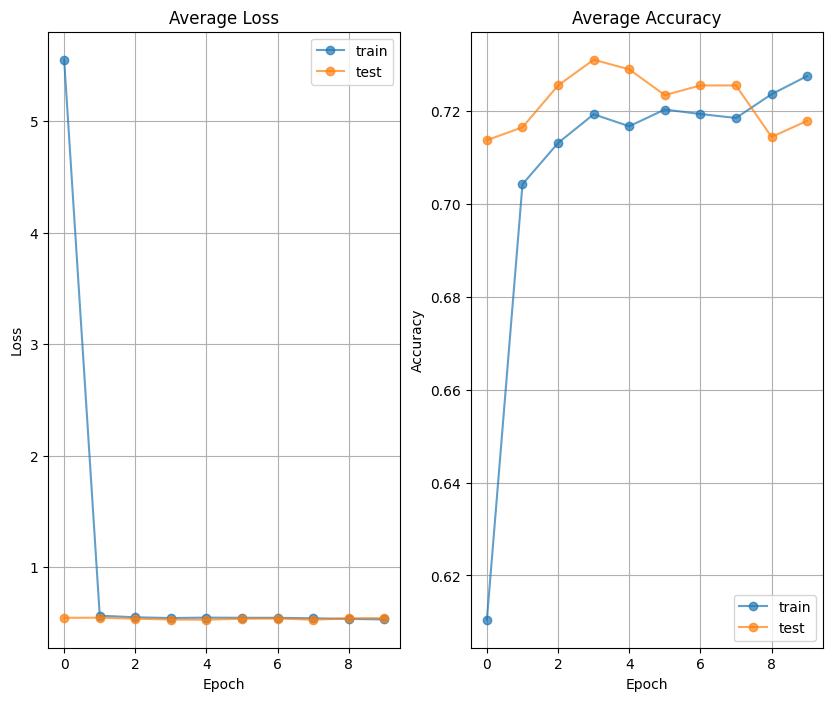

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.subplot(1,2,1)
plt.plot(losses[0], label='train', marker='o', alpha=0.7)
plt.plot(losses[1], label='test', marker='o', alpha=0.7)
plt.grid(True)
plt.legend()
plt.title('Average Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(accs[0], label='train', marker='o', alpha=0.7)
plt.plot(accs[1], label='test', marker='o', alpha=0.7)
plt.grid(True)
plt.legend()
plt.title('Average Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

### Confusion matrix

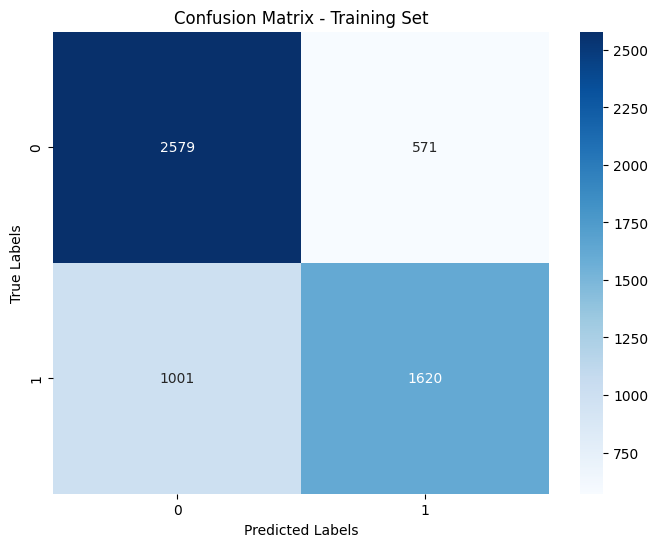

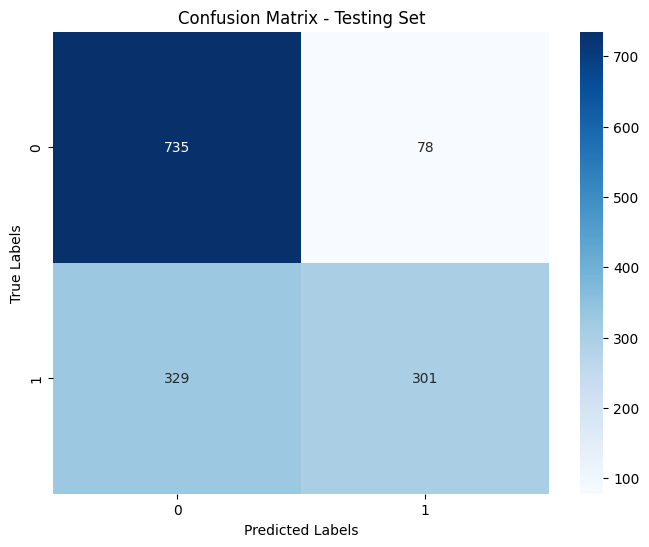

In [ ]:
import seaborn as sns

# Create a heatmap for the training set confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Training Set')
plt.show()

# Create a heatmap for the testing set confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Testing Set')
plt.show()

## Permutation Feature Importance

In [ ]:
def feature_importance(n):
  # for each feature j in dataset D
  score = accs[1][-1]
  feature_list = []
  for j in X_test.columns:
    total = 0.0
    # for each repetition k in 1-K
    for i in range(n):
      # randomly shuffle column j and save into a copy D'
      X_test1 = X_test.copy()
      col_j = X_test1[j]
      col_j = np.random.permutation(col_j)
      X_test1[j] = col_j
      # compute the accuracy of model m on dataset D'
      accuracy = evaluate(model, X_test1, y_test, 64)[1]
      # compute importance for feature f (of column j) defined as importance=accuracy-1/K*sum(accuracy of repetition k of feature j)|k=1 -> K
      total += accuracy
    f_importance = score - total/n
    feature_list.append(f_importance)
  return feature_list

In [ ]:
feature_im = feature_importance(10)

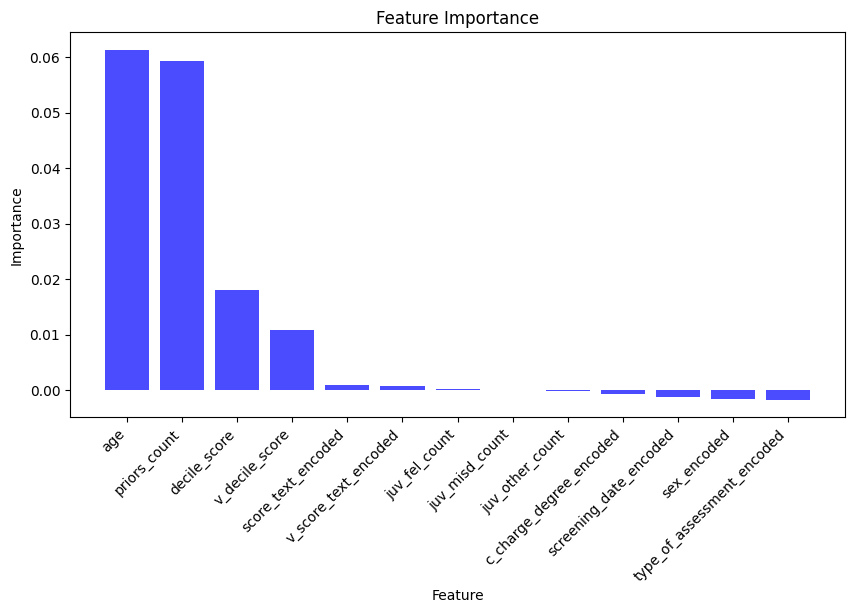

In [ ]:
#graphing feature importance
sorted_indices = sorted(feature_im, reverse=True)

plt.figure(figsize=(10, 5))
plt.bar(range(X_test.shape[1]), sorted_indices, color='blue', alpha=0.7)
plt.xticks(ticks=range(X_test.shape[1]), labels=X_test.columns, rotation=45, ha='right')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

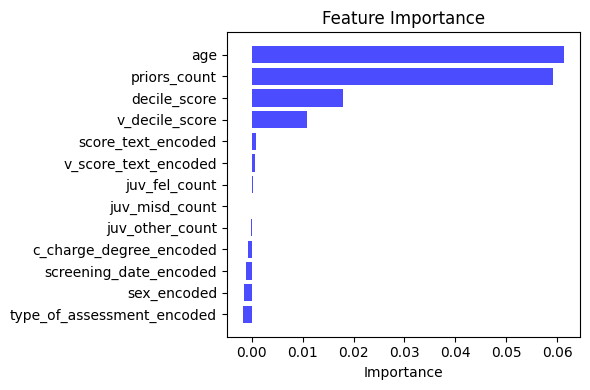

In [ ]:
from PIL import Image, ImageDraw, ImageFont

features = X_test.columns
importances = sorted_indices

fig, ax = plt.subplots(figsize=(6, 4))
ax.barh(features, importances, color='blue', alpha=0.7)
ax.invert_yaxis()  # Invert y-axis for descending order

# Customize the plot
ax.set_xlabel('Importance')
ax.set_title('Feature Importance')
plt.tight_layout()

# Show the plot
plt.show()

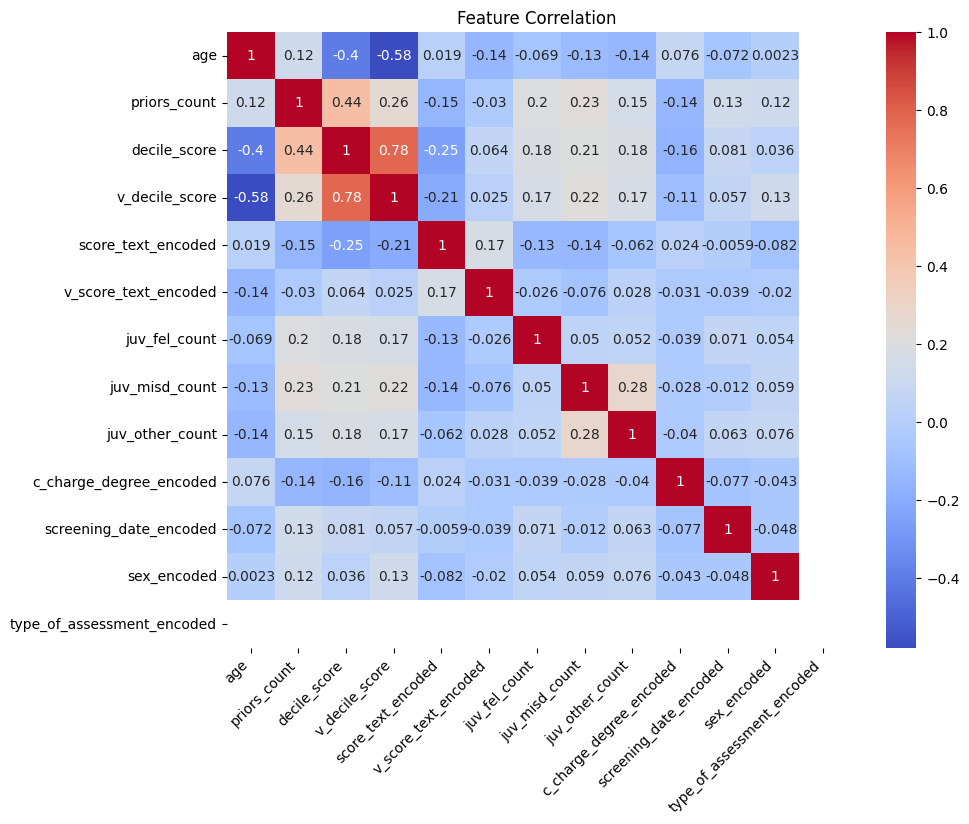

In [ ]:
import seaborn as sns

# Assuming you have a DataFrame called 'data' with your features as columns
correlation_matrix = X_test.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Customize the plot
plt.title('Feature Correlation')
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.show()